# Step 1
1. Pip Install Kneed Library 
* The kneed library in Python is a package that provides an automated method for finding the "knee" or "elbow" point in a curve. This point represents a significant change or a bend in the curve and is often used to determine the optimal number of clusters or components in data analysis tasks.

In [1]:
!pip install kneed

<center><h1> Customer Segmentation </h1></center>

**Some Details About Data**
* CUST_ID: Credit card holder ID
* BALANCE: Monthly average balance (based on daily balance averages)
* BALANCE_FREQUENCY: Ratio of last 12 months with balance.How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES: Total purchase amount spent during last 12 months
* ONEOFF_PURCHASES: Total amount of one-off purchases
* INSTALLMENTS_PURCHASES: Total amount of installment purchases
* CASH_ADVANCE: Total cash-advance amount
* PURCHASES_ FREQUENCY: Frequency of purchases (Percent of months with at least one purchase).How frequently the Purchases are being made score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFF_PURCHASES_FREQUENCY: Frequency of one-off-purchases.How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) 
* PURCHASES_INSTALLMENTS_FREQUENCY: Frequency of installment purchases.How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASH_ADVANCE_ FREQUENCY: Cash-Advance frequency
* AVERAGE_PURCHASE_TRX: Average amount per purchase transaction
* CASH_ADVANCE_TRX: Average amount per cash-advance transaction
* PURCHASES_TRX: Average amount per purchase transaction
* CREDIT_LIMIT: Credit limit
* PAYMENTS: Total payments (due amount paid by the customer to decrease their statement balance) in the period
* MINIMUM_PAYMENTS: Total minimum payments due in the period.
* PRC_FULL_PAYMEN: Percentage of months with full payment of the due statement balance
* TENURE: Number of months as a customer

# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">CUSTOMER SEGMENTATION</p>

<img src="https://www.cleartouch.in/wp-content/uploads/2023/02/Customer-Segmentation.png">

In this project, I will be performing an unsupervised clustering of data on the customer's records from a groceries firm's database. Customer segmentation is the practice of separating customers into groups that reflect similarities among customers in each cluster. I will divide customers into segments to optimize the significance of each customer to the business. To modify products according to distinct needs and behaviours of the customers. It also helps the business to cater to the concerns of different types of customers.


   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>   
    
* [1. IMPORTING LIBRARIES](#1)
    
* [2. LOADING DATA](#2)
    
* [3. DATA CLEANING](#3)
    
* [4. DATA PREPROCESSING](#4)   
    
* [5. DIMENSIONALITY REDUCTION](#5) 
      
* [6. CLUSTERING](#6)
    
* [7. EVALUATING MODELS](#7)
    
* [8. PROFILING](#8)
    
* [9. CONCLUSION](#9)
    
* [10. END](#10)


<a id="1"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">IMPORTING LIBRARIES</p>

In [3]:
# 1. Import Needed Libraries
import pandas as pd
import numpy as np
#---------------------------------------------------------
# 2. Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
from kneed import KneeLocator
#----------------------------------------------------------
# 3. data modeling
from sklearn.cluster import KMeans
#-----------------------------------------------------------
# 4. Model performance
from sklearn.preprocessing import  StandardScaler
from sklearn import metrics
from sklearn.metrics import silhouette_score
#from tqdm import tqdm
#from sklearn.metrics import calinski_harabasz_score
#from sklearn.metrics import davies_bouldin_score
#from sklearn.decomposition import PCA
#---------------------------------------------------------------
#5.1 warnings 
# The warnings module was  as a way to warn programmers about changes in language or library features
import warnings
warnings.simplefilter(action='ignore')

<a id="2"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">LOADING DATA</p>

In [4]:
#Loading the dataset
data = pd.read_csv("D:\\Array Diploma\\Data\\Customer_Data (1).csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


<a id="3"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DATA CLEANING</p>

**From Data I Need Know Some Information**
1. Know Shape Of Data 
2. Data Columns
3. Show Information About Data
4. to view some basic statistical details of train data
5. total numbers of Unique value in the dataframe.
6. Find the total number of missing values in the dataframe
7. The Percentage Of Missing Values
8. Create A Dataframe
9. checking the value which is Null for Credit Limit
10. dropping off the missing value for Credit Limit
11. Now again check the missing values.
12. lets see if we have any duplicated entries and the result shows that all entries are unique

In [15]:
print('The Shape Of Data Is ==> ',data.shape)

The Shape Of Data Is ==>  (8950, 18)


In [7]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [5]:
#Information on features 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [9]:
## printing total numbers of Unique value in the dataframe. 
data.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

**From the above output, we can conclude and note that:**

* There are missing values (Null) in CREDIT_LIMIT , MINIMUM_PAYMENTS Columns
* There are some categorical features in our data frame; as there are some features in dtype: object). So we will need to encode them into numeric forms later. 

First of all, for the missing values, I am simply going to drop the rows that have missing income values. 

In [10]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
missing_count= data.isnull().sum()  #the count of missing values
value_count  = data.isnull().count()#the count of all values

In [12]:
missing_percentage= round(missing_count/value_count*100,2)#the percentage of missing values
missing_df= pd.DataFrame({'count': missing_count,'percentage':missing_percentage })#create a dataframe
print(missing_df)

                                  count  percentage
CUST_ID                               0        0.00
BALANCE                               0        0.00
BALANCE_FREQUENCY                     0        0.00
PURCHASES                             0        0.00
ONEOFF_PURCHASES                      0        0.00
INSTALLMENTS_PURCHASES                0        0.00
CASH_ADVANCE                          0        0.00
PURCHASES_FREQUENCY                   0        0.00
ONEOFF_PURCHASES_FREQUENCY            0        0.00
PURCHASES_INSTALLMENTS_FREQUENCY      0        0.00
CASH_ADVANCE_FREQUENCY                0        0.00
CASH_ADVANCE_TRX                      0        0.00
PURCHASES_TRX                         0        0.00
CREDIT_LIMIT                          1        0.01
PAYMENTS                              0        0.00
MINIMUM_PAYMENTS                    313        3.50
PRC_FULL_PAYMENT                      0        0.00
TENURE                                0        0.00


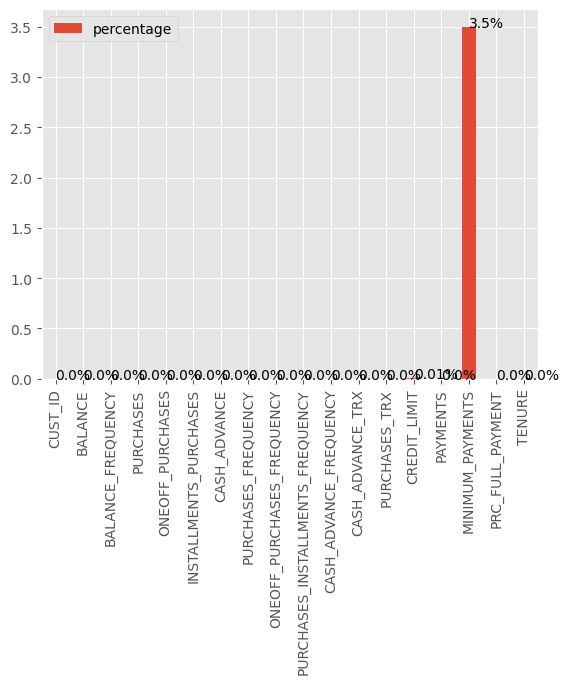

In [13]:
plt.style.use('ggplot')
barchart=missing_df.plot.bar(y= 'percentage')
for index, percentage in enumerate(missing_percentage):
    barchart.text(index,percentage, str(percentage)+"%")

In [16]:
# checking the value which is Null for Credit Limit
data[data['CREDIT_LIMIT'].isnull()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
5203,C15349,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,0.0,6


In [17]:
# dropping off the missing value for Credit Limit
data = data.drop(5203)
# resetting the index after dropping the record:
data = data.reset_index(drop=True)

In [18]:
data[['PAYMENTS', 'MINIMUM_PAYMENTS']][data['MINIMUM_PAYMENTS'].isna()]

,PAYMENTS,MINIMUM_PAYMENTS
3,0.000000,NaN
45,0.000000,NaN
47,0.000000,NaN
54,417.016763,NaN
55,0.000000,NaN
...,...,...
8918,0.000000,NaN
8928,0.000000,NaN
8934,0.000000,NaN
8943,0.000000,NaN


**Check The Maximum Value Iteration In MINIMUM_PAYMENTS Column**
1. Check The Mean & Median Value For MINIMUM_PAYMENTS Column
2. Will be Replaced The NAN Value with the closest, most frequently occurring value in this column
* When Check The Maximum Value Count In Column = 312.5 , and median is = 312.45
* will replace The NAN Values By MINIMUM_PAYMENTS.median()

In [19]:
print('The Most Common Value For MINIMUM_PAYMENTS Column In Train Data  Is  ==> %.1f .' %data['MINIMUM_PAYMENTS'].value_counts().idxmax())
print('The Mean Of MINIMUM_PAYMENTS Column Is ==> ',data['MINIMUM_PAYMENTS'].mean())
print('The Median Of MINIMUM_PAYMENTS Column Is ==> ',data['MINIMUM_PAYMENTS'].median())
data['MINIMUM_PAYMENTS']= data['MINIMUM_PAYMENTS'].fillna(value=data['MINIMUM_PAYMENTS'].median())

The Most Common Value For MINIMUM_PAYMENTS Column In Train Data  Is  ==> 299.4 .
The Mean Of MINIMUM_PAYMENTS Column Is ==>  864.3049429326078
The Median Of MINIMUM_PAYMENTS Column Is ==>  312.4522915


**Check Null Data**

In [20]:
# Now again check the missing values.
data.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

**lets see if we have any duplicated entries and the result shows that all entries are unique**

In [21]:
print('The Summation Of Duplicated Data ==> ',data.duplicated().sum())

The Summation Of Duplicated Data ==>  0


* Monthly_avg_purchase
* Display Monthly_Avg_Purchase
* Monthly_Cash_Advance Amount
* ONEOFF_PURCHASES Count

In [22]:
data['Monthly_avg_purchase']=data['PURCHASES']/data['TENURE']
print(data['Monthly_avg_purchase'].head(),'\n ',
data['TENURE'].head(),'\n', data['PURCHASES'].head())

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_avg_purchase, dtype: float64 
  0    12
1    12
2    12
3    12
4    12
Name: TENURE, dtype: int64 
 0      95.40
1       0.00
2     773.17
3    1499.00
4      16.00
Name: PURCHASES, dtype: float64


**Monthly_cash_advance Amount**

In [23]:
data['Monthly_cash_advance']=data['CASH_ADVANCE']/data['TENURE']
data[data['ONEOFF_PURCHASES']==0]['ONEOFF_PURCHASES'].count()

4301

**Exploratory Data Analysis (EDA)📊 --> used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods**

<AxesSubplot: >

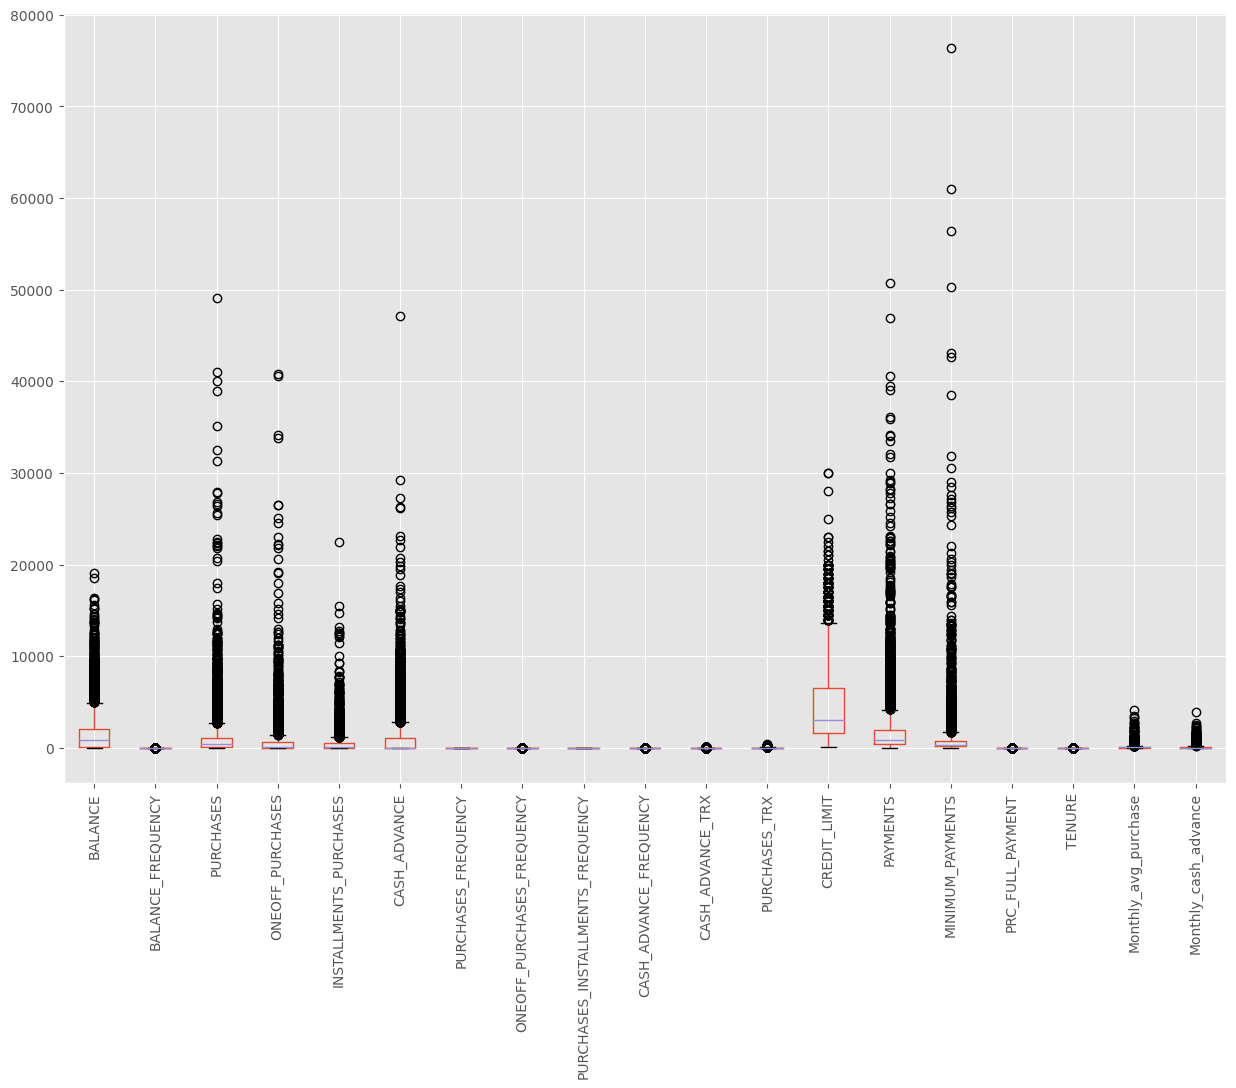

In [24]:
data.boxplot(rot=90 , figsize=(15,10))

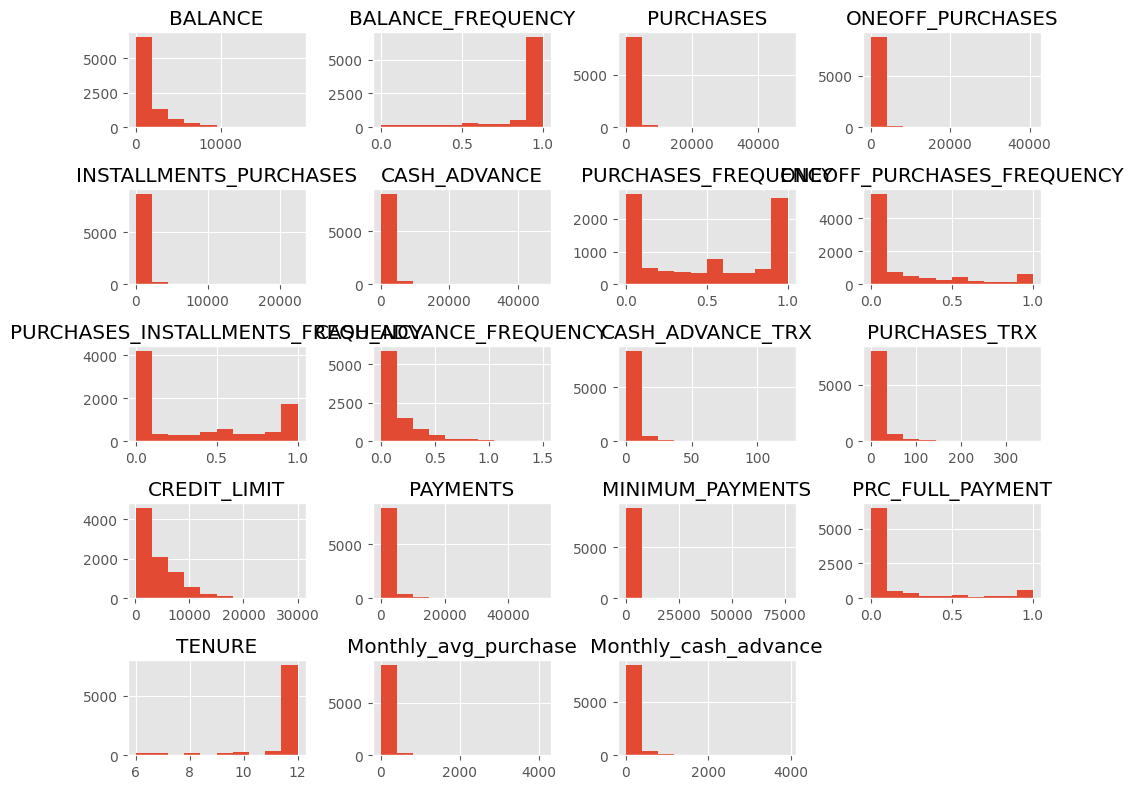

In [25]:
data.hist(figsize=(10,8))
plt.tight_layout()


**Correlation**
*  Higher Level Correlation(Positive Correlation) --> Cash Advance Column With Cash Advance Frequency & Credit Limit Columns . 
*  Higher Level Correlation(Positive Correlation) --> Payments Variable Column with Purchase & One Off Purchases Columns .
*  Lower  Level Correlation(Negative Correlation) --> Tenur Column With Cash Advance & Cash Advance Frequency Variables Columns.
*  Strong Positive Correlation --> PURACHASES_INSTALLMENTS_FREQUENCY Column With PURCHASE FREQUENCY Column .
*  Strong Negative Correlation --> BALANCE Column with PRC_FULL_PAYMENT Column .
*  Not Any Correlation (No Linear Relationship ) --> TENURE Column has almost no correlation with any .

<AxesSubplot: >

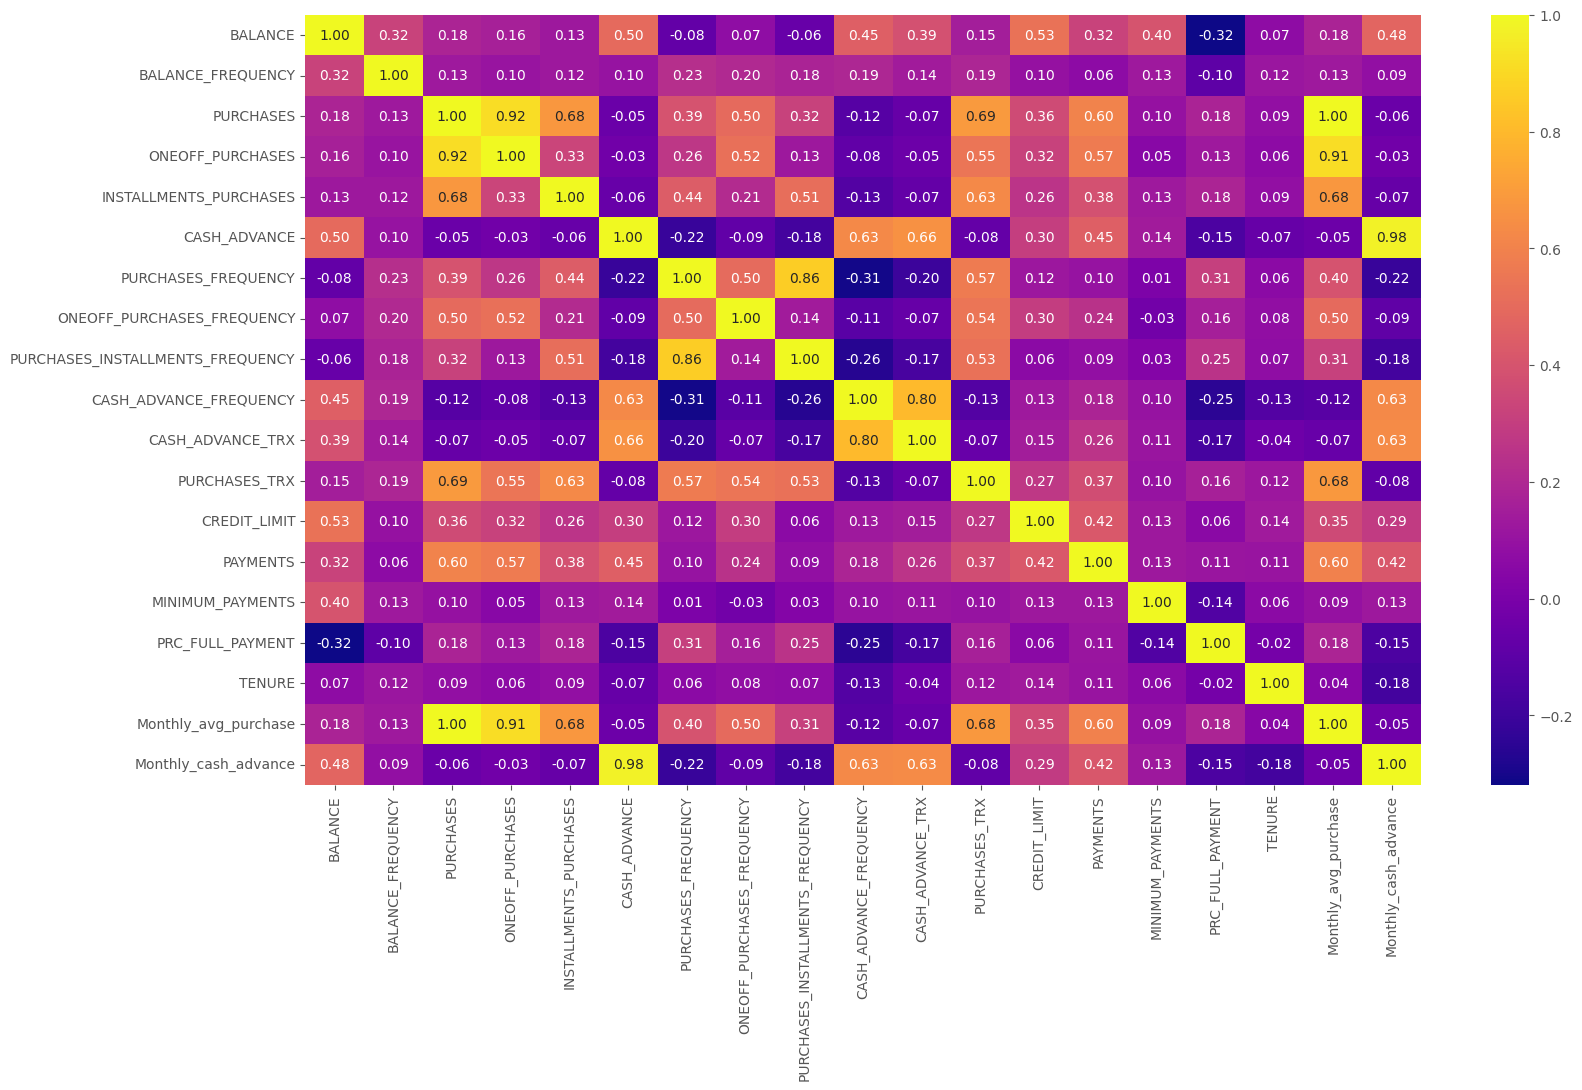

In [26]:
plt.figure(figsize = (18,10))
sns.heatmap(data.corr(), cmap= 'plasma',annot = True , fmt='.2f' )

The data is quite clean and the new features have been included. I will proceed to the next step. That is, preprocessing the data. 

<a id="4"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DATA PREPROCESSING</p>

In this section, I will be preprocessing the data to perform clustering operations.

**The following steps are applied to preprocess the data:**

* Label encoding the categorical features
* Check Data Types
* Adding Anomaly Values & Scores Columns To Data1
* Display Data 1 After Adding Anomaly & Score Values Columns To Data1

In [28]:
# Applied LabelEncoder For Customer_ID Column
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data['CUST_ID'] = LE.fit_transform(data['CUST_ID'])

In [29]:
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance
0,0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000
1,1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124
2,2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000
3,3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.452292,0.000000,12,124.916667,17.149001
4,4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,8944,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,48.520000,0.000000
8945,8945,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.452292,0.000000,6,50.000000,0.000000
8946,8946,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,24.066667,0.000000
8947,8947,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0.000000,6.093130


<a id="4"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">IsolationForest LIBRARY</p>

* Some Observations 
1. N_Estimators --> int ,default = 100, --> The number of base estimators in the ensemble. 
2. The number of samples to draw from X to train each base estimator.
* 2.1 --> If int, then draw max_samples samples.
* 2.2 --> If float, then draw max_samples * X.shape[0] samples.
* 2.3 --> If “auto”, then max_samples=min(256, n_samples).
3.  contamination‘auto’ or float, default=’auto’ 
* --> The amount of contamination of the data set, i.e. the proportion of outliers in the data set. Used when fitting to define the threshold on the scores of the samples.
* 3.1 --> If ‘auto’, the threshold is determined as in the original paper.
* 3.2 --> If float, the contamination should be in the range (0, 0.5].

In [31]:
from sklearn.ensemble import IsolationForest
# Model building
model=IsolationForest(n_estimators=150, max_samples='auto', contamination=float(0.1), max_features=1.0)
model.fit(data)

IsolationForest(contamination=0.1, n_estimators=150)

In [32]:
# Adding 'scores' and 'anomaly' colums to df
scores=model.decision_function(data)
anomaly=model.predict(data)

data['scores']=scores
data['anomaly']=anomaly

anomaly = data.loc[data['anomaly']==-1]
anomaly_index = list(anomaly.index)
print('Total number of outliers is:', len(anomaly))

Total number of outliers is: 895


In [34]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance,scores,anomaly
0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,0.112787,1
1,1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,0.035938,1
2,2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,0.057498,1
3,3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,1,7500.0,0.000000,312.452292,0.000000,12,124.916667,17.149001,0.063270,1
4,4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,0.129952,1


1. **Visualization Data1 Before Drop Outliers**
2. **Drop Outliers From Data** 
3. **Visualization Data1 After Drop  Outliers** 
4. **Drop Anomaly , Scores Column From Data**

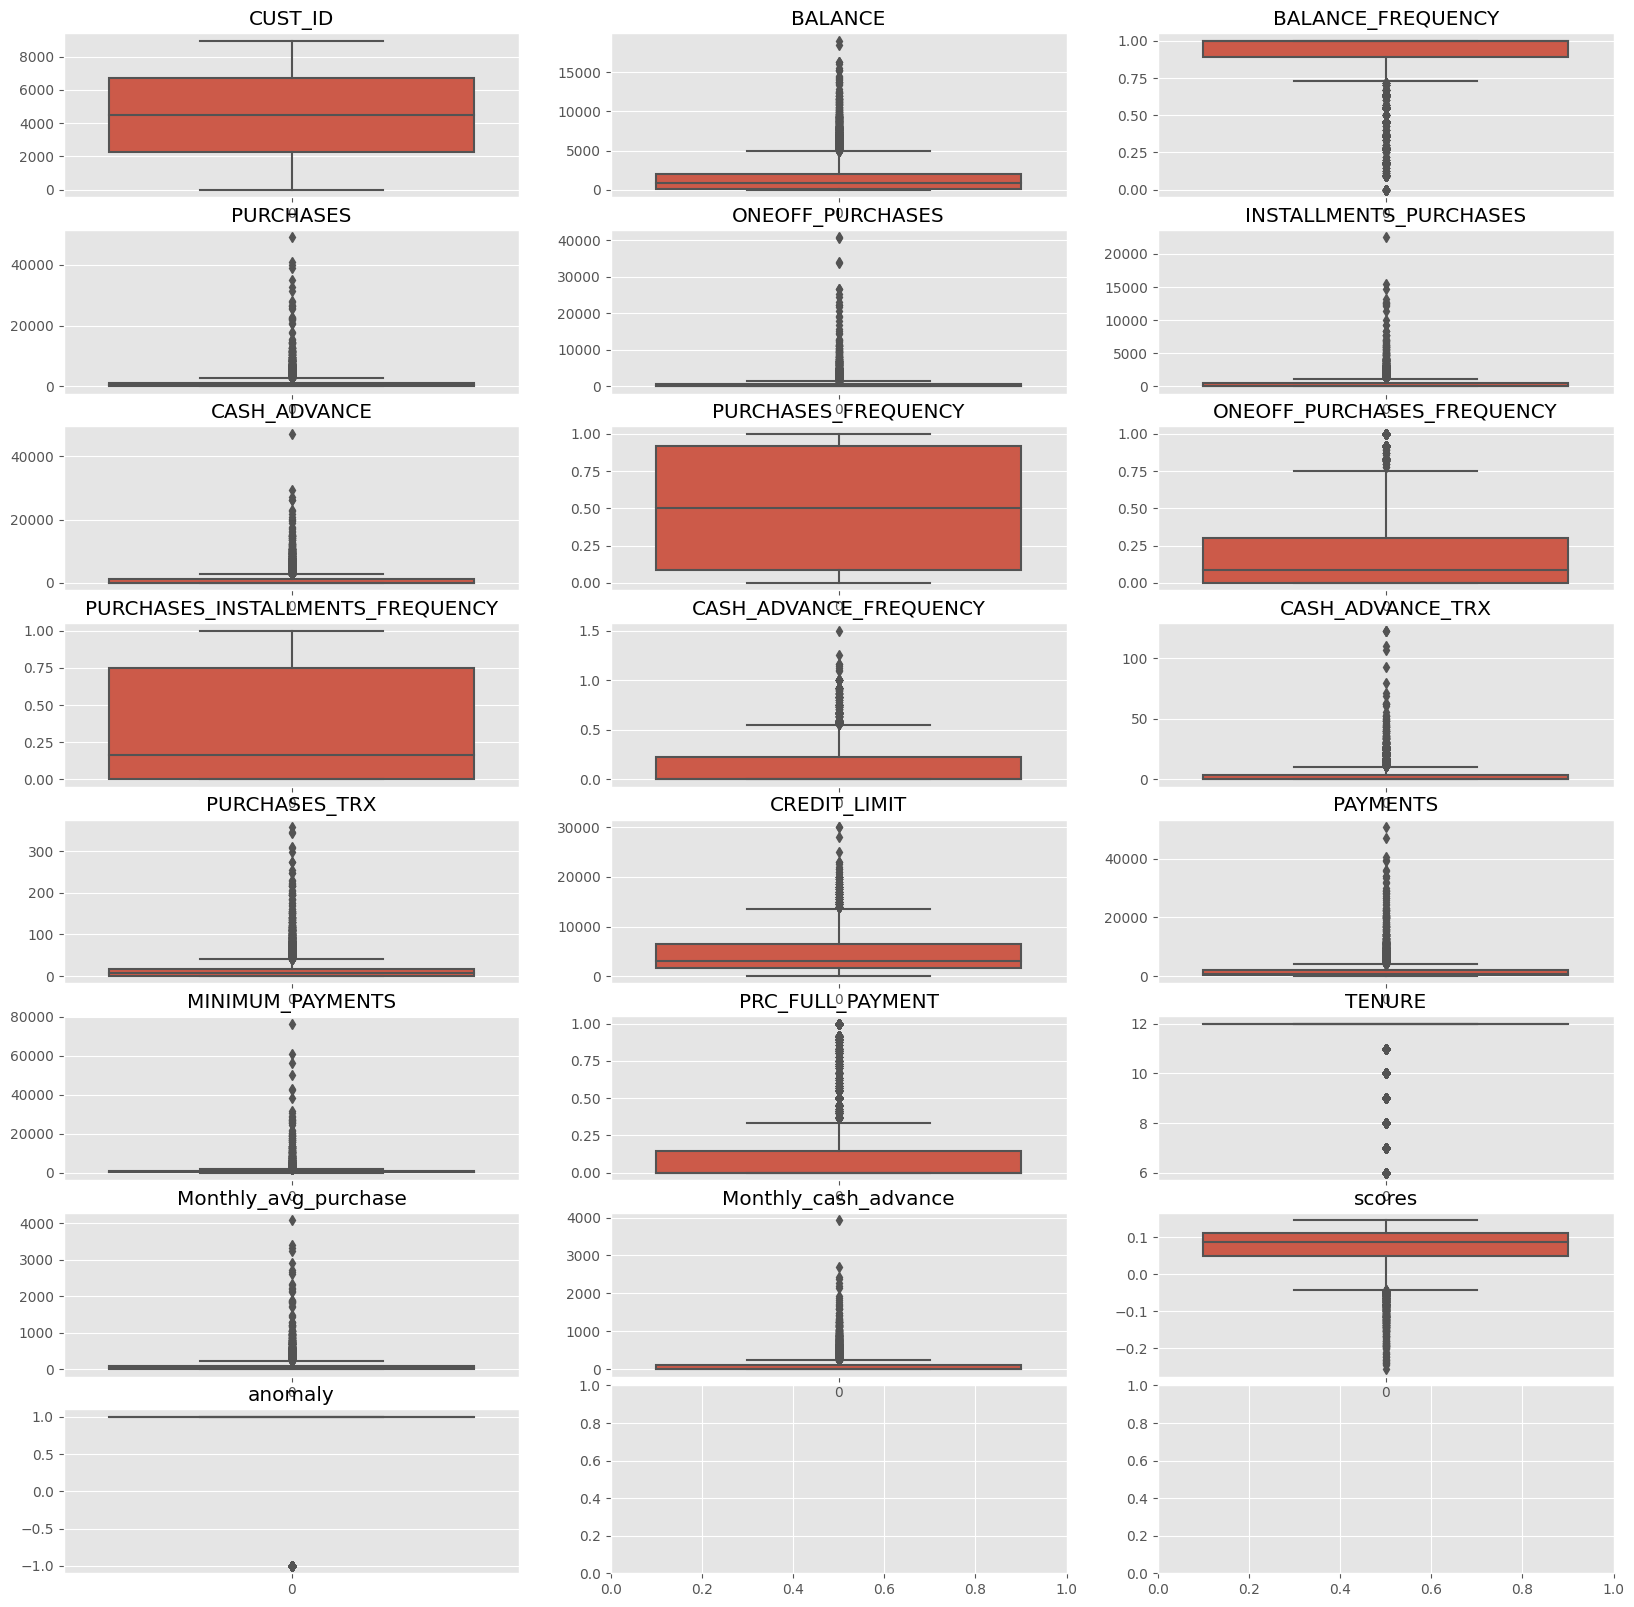

In [35]:
#Visualization Data1 Before Drop Outliers
fig= plt.subplots(nrows=7 , ncols=3 , figsize=(20,20))
for i in range (len(data.columns)):
    plt.subplot(8,3,i+1)
    ax=  sns.boxplot(data[data.columns[i]])
    plt.title(data.columns[i])
    plt.tight_layout()

In [36]:
# dropping outliers
data = data.drop(anomaly_index, axis = 0).reset_index(drop=True)

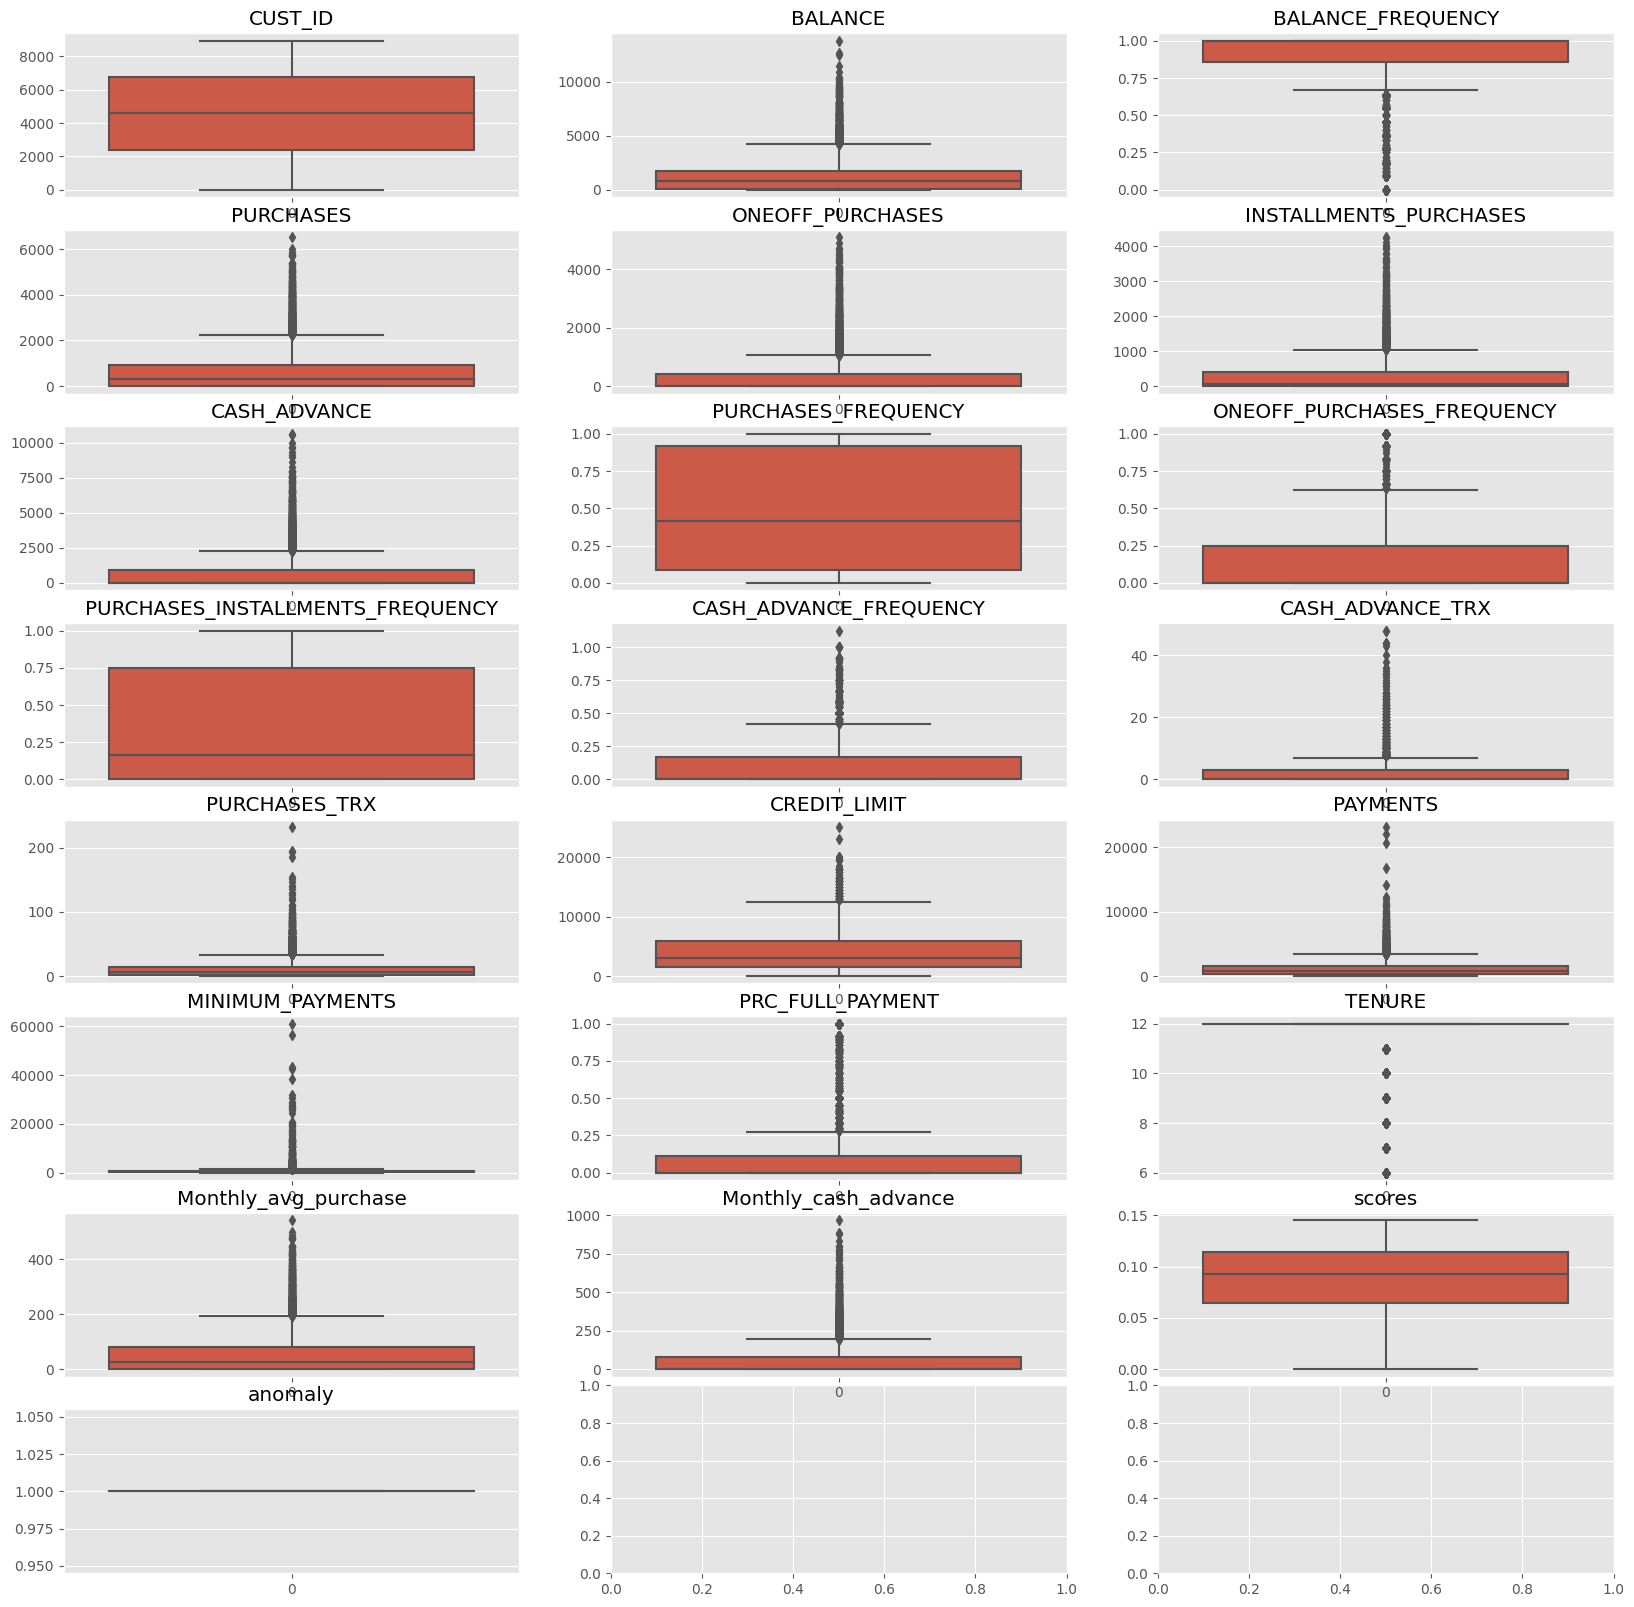

In [37]:
fig= plt.subplots(nrows=7 , ncols=3 , figsize=(20,20))
for i in range (len(data.columns)):
    plt.subplot(8,3,i+1)
    ax=  sns.boxplot(data[data.columns[i]])
    plt.title(data.columns[i])
    plt.tight_layout()

In [38]:
#drop the 'scores','anomaly' columns which doesn't provide any info .
data.drop(columns='scores' , axis=1 , inplace=True)
data.drop(columns='anomaly' , axis=1 , inplace=True)

<a id="5"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">MODEL BUILDING</p>

1. * Convert Data From INT64 To FLOAT64
2. * Check Data Types
3. * Standardrizing data

In [40]:
data = data.astype(float)
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance
0,0.0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,7.950000,0.000000
1,1.0,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0.000000,536.912124
2,2.0,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,64.430833,0.000000
3,3.0,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.452292,0.000000,12.0,124.916667,17.149001
4,4.0,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,1.333333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8049,8943.0,193.571722,0.833333,1012.73,1012.73,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0.0,2.0,4000.0,0.000000,312.452292,0.000000,6.0,168.788333,0.000000
8050,8944.0,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,325.594462,48.886365,0.500000,6.0,48.520000,0.000000
8051,8945.0,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0.0,6.0,1000.0,275.861322,312.452292,0.000000,6.0,50.000000,0.000000
8052,8946.0,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0.0,5.0,1000.0,81.270775,82.418369,0.250000,6.0,24.066667,0.000000


In [41]:
data.dtypes

CUST_ID                             float64
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                    float64
PURCHASES_TRX                       float64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                              float64
Monthly_avg_purchase                float64
Monthly_cash_advance                float64
dtype: object

In [42]:
scaler= StandardScaler()
scaled_features=scaler.fit_transform(data)
scaled_df=pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
scaled_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_avg_purchase,Monthly_cash_advance
0,-1.783681,-0.760425,-0.217176,-0.627431,-0.538860,-0.415720,-0.540963,-0.758953,-0.633727,-0.679977,-0.672699,-0.547740,-0.584876,-0.967815,-0.712514,-0.287842,-0.513268,0.345921,-0.639705,-0.540034
1,-1.783290,1.156021,0.156654,-0.732561,-0.538860,-0.599007,4.511434,-1.177552,-0.633727,-0.892154,0.783726,0.335929,-0.709914,0.970489,2.009759,0.170254,0.273880,0.345921,-0.743545,4.200239
2,-1.782899,0.727266,0.530485,0.119462,0.640592,-0.599007,-0.540963,1.334034,3.053985,-0.892154,-0.672699,-0.547740,0.040310,1.132015,-0.419254,-0.048305,-0.513268,0.345921,0.098026,-0.540034
3,-1.782509,0.225067,-0.964837,0.919316,1.747829,-0.599007,-0.379589,-0.968254,-0.326419,-0.892154,-0.187226,-0.326822,-0.647395,1.132015,-0.853332,-0.202913,-0.513268,0.345921,0.888068,-0.388629
4,-1.782118,-0.289544,0.530485,-0.714929,-0.514452,-0.599007,-0.540963,-0.968254,-0.326419,-0.892154,-0.672699,-0.547740,-0.647395,-0.903204,-0.379990,-0.236140,-0.513268,0.345921,-0.726129,-0.540034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8049,1.709738,-0.667880,-0.154873,0.383454,1.006035,-0.599007,-0.540963,-0.340357,0.595509,-0.892154,-0.672699,-0.547740,-0.584876,0.001337,-0.853332,-0.202913,-0.513268,-4.467289,1.461102,-0.540034
8050,1.710128,-0.767946,0.530485,-0.411750,-0.538860,-0.039693,-0.540963,1.334034,-0.633727,1.229625,-0.672699,-0.547740,-0.334802,-0.967815,-0.626132,-0.332345,1.257817,-4.467289,-0.109795,-0.540034
8051,1.710519,-0.773589,0.530485,-0.401965,-0.538860,-0.022632,-0.540963,1.334034,-0.633727,1.229625,-0.672699,-0.547740,-0.334802,-0.967815,-0.660836,-0.202913,-0.513268,-4.467289,-0.090464,-0.540034
8052,1.710910,-0.771034,-0.154873,-0.573434,-0.538860,-0.321579,-0.540963,0.915436,-0.633727,0.805271,-0.672699,-0.547740,-0.397320,-0.967815,-0.796621,-0.315878,0.372275,-4.467289,-0.429195,-0.540034


<a id="6"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">CLUSTERING</p>


**Steps involved in the Clustering**
1. **Determining The Optimal Number Of Clusters**
* 1.1 Selecting optimal number of clusters is key to applying clustering algorithm to the dataset, such as k-means clustering .which requires the user to specify the number of clusters k to be generated.
* 1.2 This is a somewhat arbitrary procedure, one of the weakest aspects of performing cluster analysis.
* 1.3 The major difference between elbow and silhouette method is that elbow only calculates the euclidean distance whereas silhouette takes into account variables such as variance, skewness, high-low differences, etc.
2. **Both the Elbow method / SSE Plot and the Silhouette method can be used interchangeably based on the details presented by the plots.**
3. **Elbow Method**
* 3.1 Elbow method is a very popular method to calculate optimal number of clusters for a given problem.
* 3.2 Within clusters the sum of square distance is calculated and plotted against the number of clusters.
* 3.3 The elbow point in plot is selected as optimal number of clusters for given problem.

In [45]:
kmeans_set={"init":"random","n_init":10,"max_iter":300,"random_state":42}

In [46]:
cluster_range = range( 1, 21 )
cluster_errors=[]
for k in cluster_range:
    kmeans= KMeans(n_clusters=k, **kmeans_set) #** open dictionry
    kmeans.fit(scaled_features)
    cluster_errors.append( kmeans.inertia_) 

In [47]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
#clusters_df[0:21]
clusters_df.head(10)

,num_clusters,cluster_errors
0,1,161080.000000
1,2,130509.683428
2,3,109379.783080
3,4,98862.955844
4,5,92810.828680
5,6,87221.605503
6,7,82304.671239
7,8,77589.719608
8,9,74299.735070
9,10,71259.242901


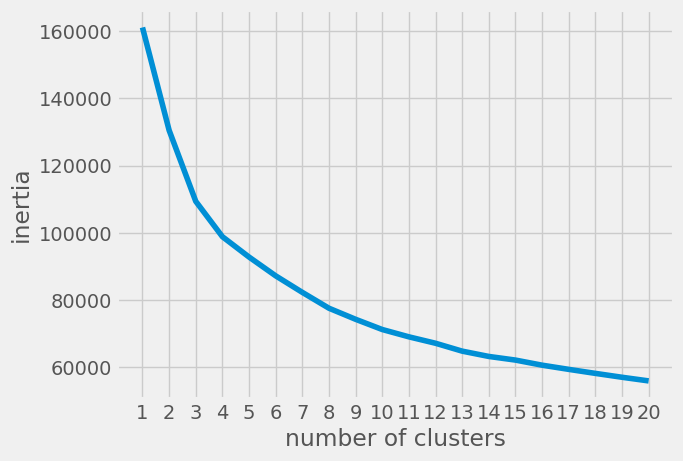

In [48]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,21),cluster_errors)
plt.xticks(range(1,21))
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

* KElbowVisualizer is a visual diagnostic tool for determining the optimal number of clusters in a K-means clustering algorithm. 
* It uses the "elbow" method, which plots the explained variance as a function of the number of clusters, and identifies the point of inflection as the optimal number of clusters.

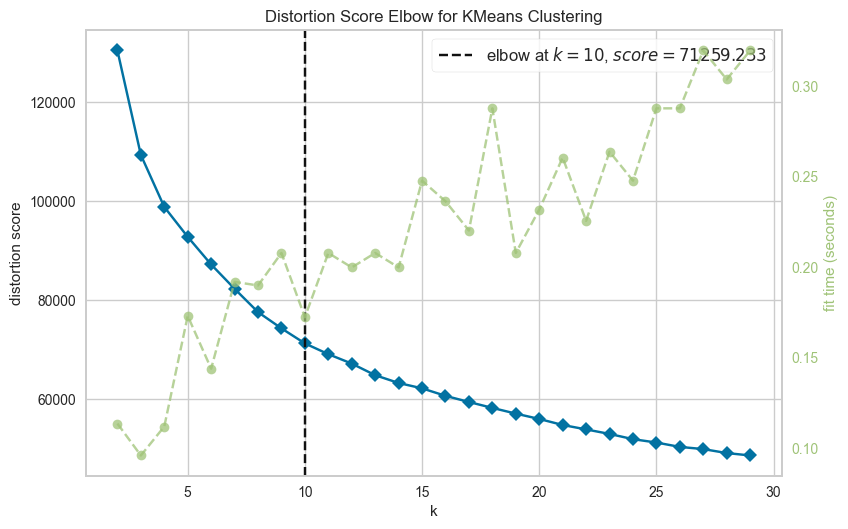

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [49]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(n_clusters=k, **kmeans_set)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(scaled_features)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

<a id="7"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">EVALUATING MODELS</p>

* **After Determine The Optimal Value Cluster** 
1. implement Elbow method to final optimal number of clusters
2. Visualiztaion Data After implement Elbow method to final optimal number of clusters

In [50]:
# Now we are going to implement Elbow method to final optimal number of clusters
k1=KneeLocator(range(1,21),cluster_errors , curve='convex', direction= 'decreasing')
k1.elbow

6

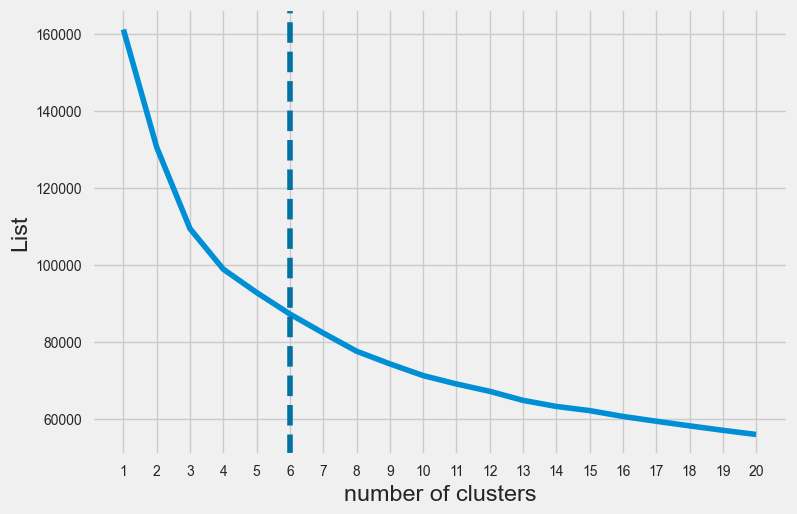

In [51]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,21),cluster_errors)
plt.xticks(range(1,21))
plt.xlabel('number of clusters')
plt.ylabel('List')
plt.axvline(x=k1.elbow, color='b', label= 'axvline-full height', ls= '--')
plt.show()

<a id="7"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">SILHOUETTE SCORE</p>

1. Silhouette Coefficient Method:
* Average silhouette approach measures the quality of a clustering.
* That is, it determines how well each object lies within its cluster.
* A high average silhouette width indicates a good clustering.
* The optimal number of clusters k is the one that maximize the average silhouette over a range of possible values for k.

## The silhouette score falls within the range [-1, 1]. 

* The silhouette score of 1 means that the clusters are very dense and nicely separated.
1. The score of 0 means that clusters are overlapping. The score of less than 0 means that data belonging to clusters may be wrong/incorrect. 

- elbow method: k=5 , k=10 
- silhouette coefficiennt: k=3

# -------------------------------------------------------------------------------------------------------------- #

1. Try Apply Kmeans When K = 3 , K = 5 , K =10 , K = 2 , Because To Check The High Accuracy Between Them .
* When Choose K = 5 Cluster , Accuracy Is ==> Silhouetter Average Score: 0.174 .
* When Choose K = 10 Cluster , Accuracy Is ==> Silhouetter Average Score: 0.192.
* When Choose K = 3 Cluster , Accuracy Is ==> Silhouetter Average Score: 0.268 .
* When Choose K = 5 Cluster , Accuracy Is ==> Silhouetter Average Score: 0.316 .
2. Show silhouette_coefficients

In [52]:
#let's try silhouette_score for k=5,10,3
# Instantiate the KMeans for 5 clusters
km = KMeans(n_clusters=5, random_state=42)
# Fit the KMeans model
km.fit_predict(scaled_features)
# Calculate Silhoutte Score
score = silhouette_score(scaled_features, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Average Score: %.3f' % score)

Silhouetter Average Score: 0.165


In [53]:
# Instantiate the KMeans for 10 clusters
km = KMeans(n_clusters=10, random_state=42)
# Fit the KMeans model
km.fit_predict(scaled_features)
# Calculate Silhoutte Score
score = silhouette_score(scaled_features, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Average Score: %.3f' % score)

Silhouetter Average Score: 0.171


In [54]:

# Instantiate the KMeans for 3 clusters
km = KMeans(n_clusters=3, random_state=42)
# Fit the KMeans model
km.fit_predict(scaled_features)
# Calculate Silhoutte Score
score = silhouette_score(scaled_features, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Average Score: %.3f' % score)

Silhouetter Average Score: 0.232


In [55]:
# Instantiate the KMeans for 2 clusters
km = KMeans(n_clusters=2, random_state=42)
# Fit the KMeans model
km.fit_predict(scaled_features)
# Calculate Silhoutte Score
score = silhouette_score(scaled_features, km.labels_, metric='euclidean')
# Print the score
print('Silhouetter Average Score: %.3f' % score)

Silhouetter Average Score: 0.194


#### the best silhouette_score k=3

In [56]:
silhouette_coefficients =[]
for k in range(2,21):#1 is the worse
    kmeans=KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(scaled_features)
    score= silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

In [57]:
silhouette_coefficients

[0.19413539040622252,
 0.231296495077154,
 0.17089386582738522,
 0.16519413985369535,
 0.17133343517662933,
 0.18122780137075203,
 0.18528792013590167,
 0.18584470656513036,
 0.1790636715277084,
 0.17892483161903217,
 0.17296622357987418,
 0.17490136953287988,
 0.14811180183793485,
 0.17368760049897472,
 0.1521776088526219,
 0.14574358210427105,
 0.14411326142035724,
 0.14122538804442356,
 0.1431710340462763]

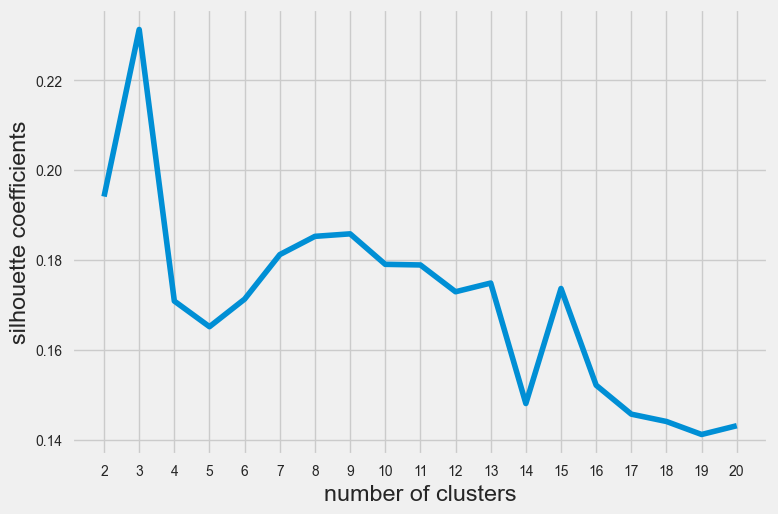

In [58]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,21),silhouette_coefficients)
plt.xticks(range(2,21))
plt.xlabel('number of clusters')
plt.ylabel('silhouette coefficients')
plt.show()

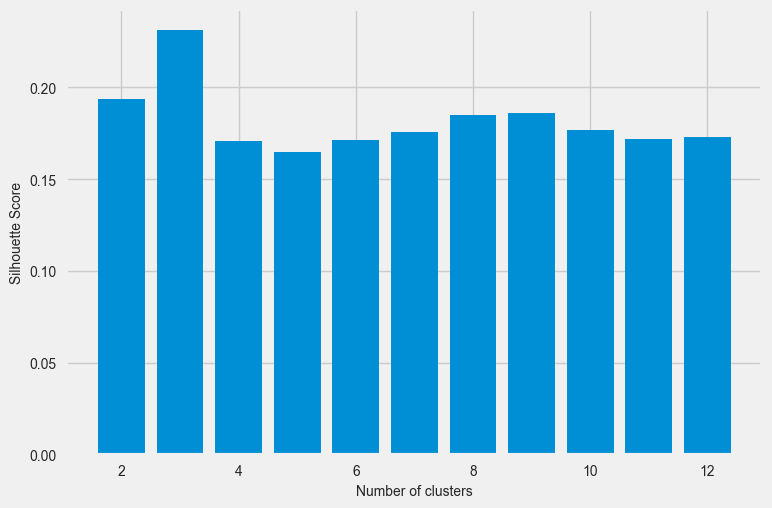

In [61]:
silhouette_scores = []

for n_cluster in range(2, 13):
    silhouette_scores.append( 
        silhouette_score(scaled_features, KMeans(n_clusters = n_cluster).fit_predict(scaled_features))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12] 

plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()
#confirming number of clusters

<a id="8"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">PROFILING</p>


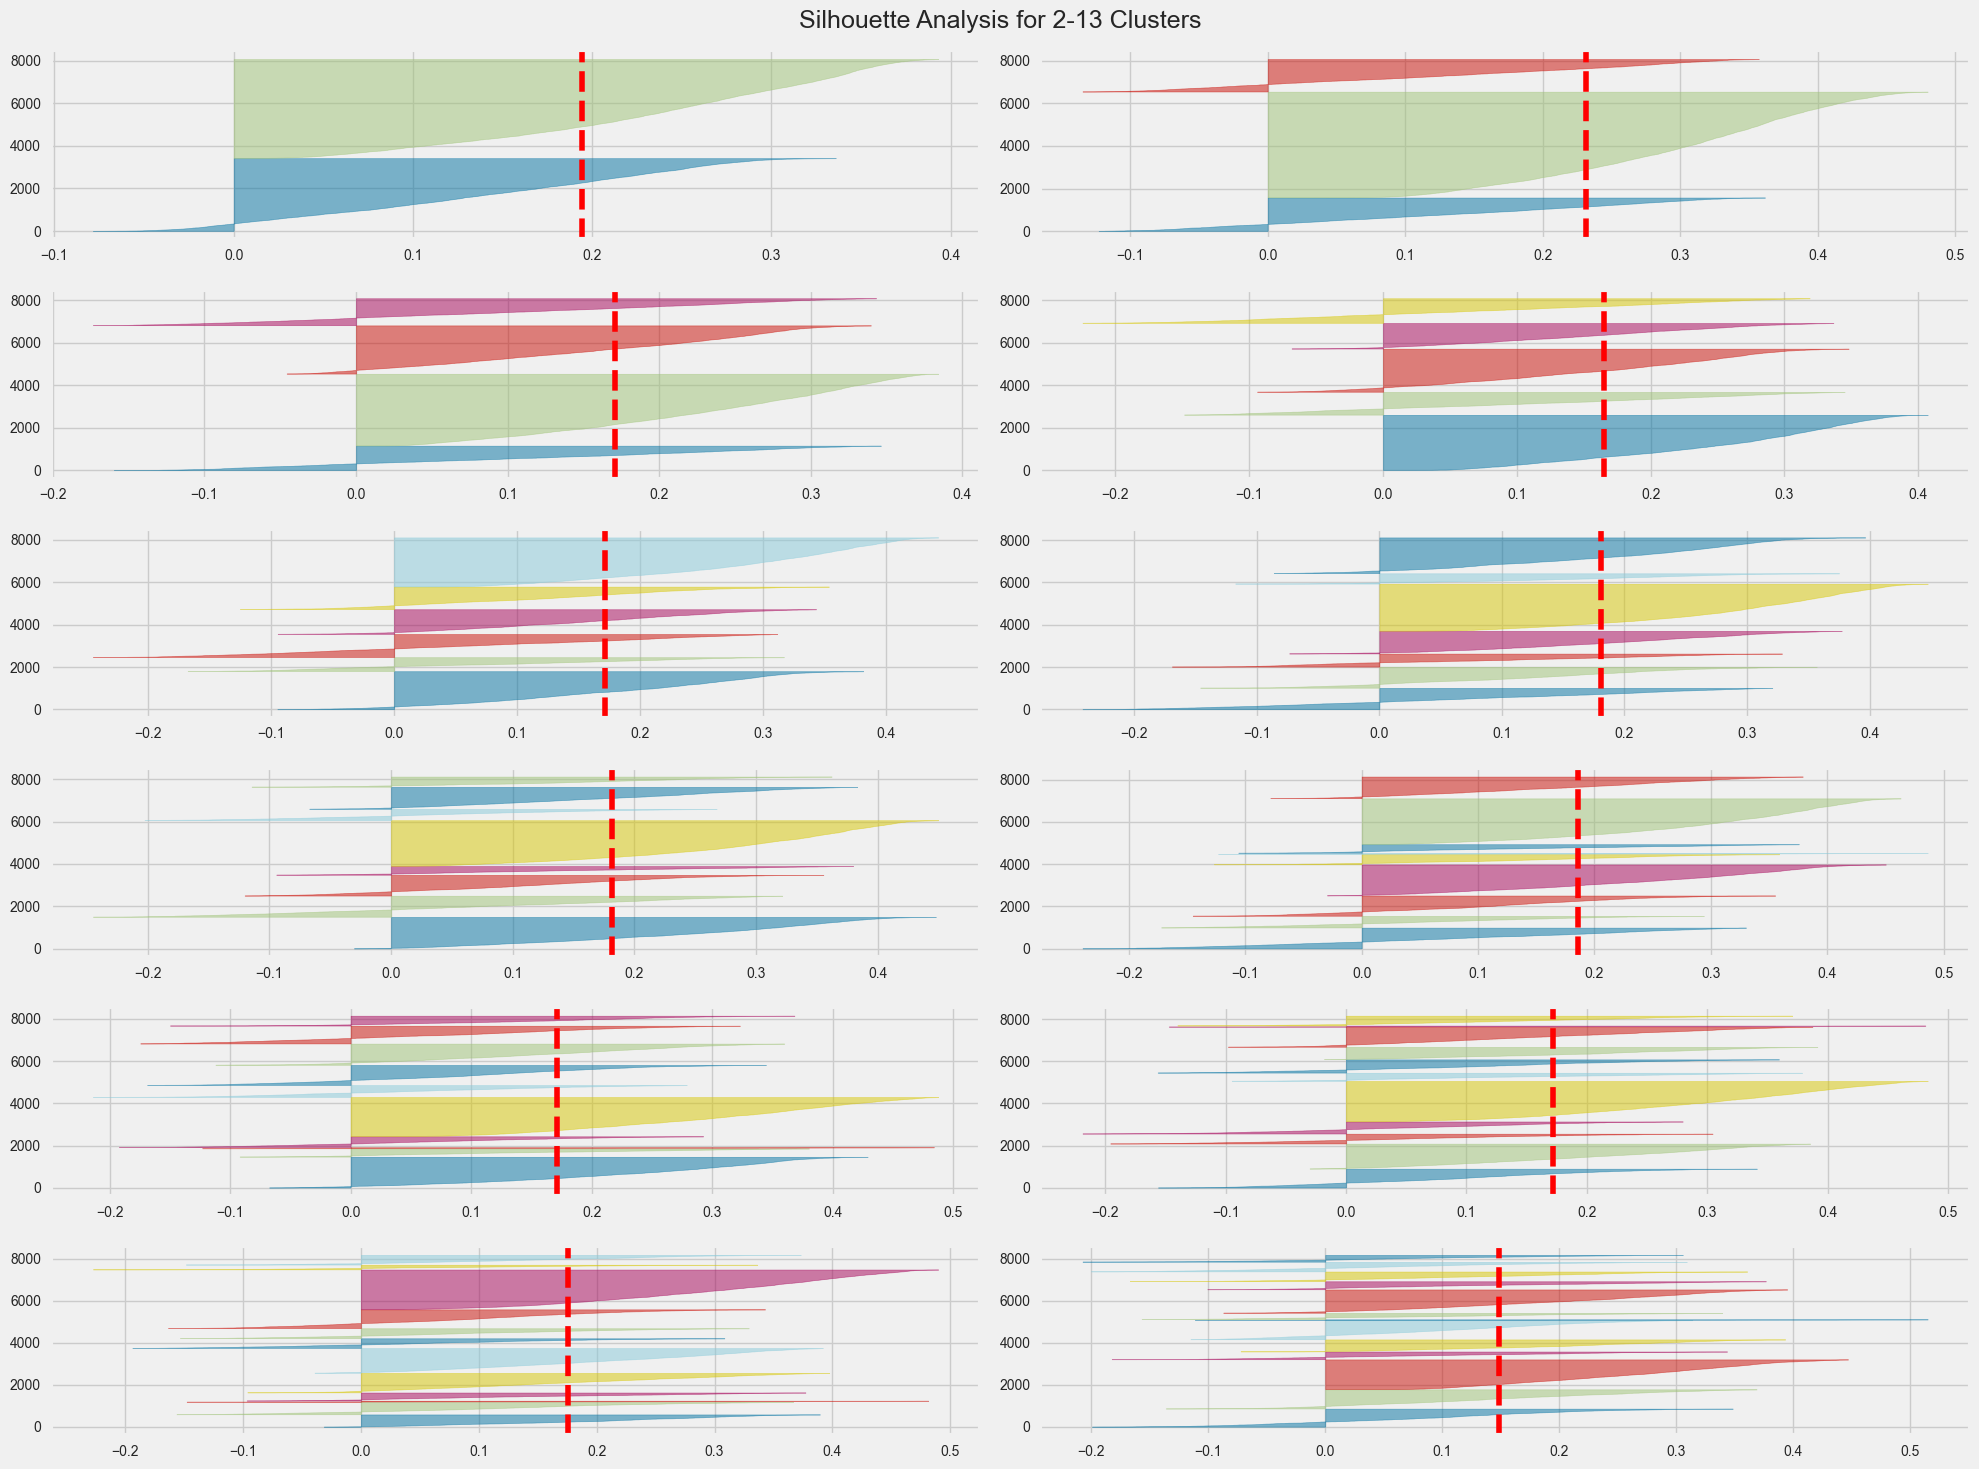

In [62]:
from yellowbrick.cluster import SilhouetteVisualizer
# Yellowbrick extends the Scikit-Learn API to make model selection and hyperparameter tuning easier.
# You can find the code to simply create Silhouette visualisation for K-Means clusters with n_cluster as 2, 3, 4, 5, 6, 7,8,9,10,11,12,13 below.

fig, ax = plt.subplots(6, 2, figsize=(20,15))
fig.suptitle('Silhouette Analysis for 2-13 Clusters', size = 18)
plt.tight_layout()

for i in [2, 3, 4, 5, 6, 7,8,9,10,11,12,13]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(scaled_features)

<a id="9"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">CONCLUSION</p>

* **Having clusters with negative silhouette scores for all values of k in the above plots shows that kmeans has not performed well in clustering, but in any case, it seems that k=3 is the best number of clusters**

* **Conclusion: 3 Clusters is chosen,because the highest value in Silhouetter Score and calinski_harabasz_score are positioned at 3th cluster.** 

<a id="10"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">END</p>